<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/explore_data_excape_min_viable_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring HTR3A protein target activity data from ExcapeDB

The Target specific data was downloaded from https://zenodo.org/record/173258#.X_44kuhKi70

Please refer to the ExCAPE-DB publication (https://pubmed.ncbi.nlm.nih.gov/28316655/) for details about the database 

Here are some details about HTR3A gene (taken from RefSeq NCBI)
*The product of this gene belongs to the ligand-gated ion channel receptor superfamily. This gene encodes subunit A of the type 3 receptor for 5-hydroxytryptamine (serotonin), a biogenic hormone that functions as a neurotransmitter, a hormone, and a mitogen. This receptor causes fast, depolarizing responses in neurons after activation. It appears that the heteromeric combination of A and B subunits is necessary to provide the full functional features of this receptor, since either subunit alone results in receptors with very low conductance and response amplitude. Alternatively spliced transcript variants encoding different isoforms have been identified.*

Diseases associated with HTR3A include Irritable Bowel Syndrome and Motion Sickness.

## Basic information about HTR3A gene:

**Present in** Chromosome 11
**Exon count:** 10

mRNA and protein information

*   NM_000869.6 → NP_000860.3 
*   NM_001161772.3 → NP_001155244.1
*   NM_213621.4 → NP_998786.3 








# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [1]:
!date # starting time

Fri Feb 12 23:08:09 UTC 2021


## Install AMPL GPU version

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

In [2]:
import requests

# Copy AMPL install script
url='https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU.sh'

downloaded_obj = requests.get(url)
with open("install_AMPL_GPU.sh", "wb") as file:
    file.write(downloaded_obj.content)


# Install and load AMPL
!chmod u+x install_AMPL_GPU.sh
!time ./install_AMPL_GPU.sh
import sys
if '/content/AMPL/lib/python3.6/site-packages' not in sys.path:
    sys.path.insert(1, '/content/AMPL/lib/python3.6/site-packages')

sys.path

--2021-02-12 23:08:09--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   226MB/s    in 0.4s    

2021-02-12 23:08:10 (226 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [94235922/94235922]

PREFIX=/content/AMPL
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /content/AMPL

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py38h261ae71_2
    - chardet==3.0.4=py38h06a4308_1003
    - conda-package-han

['',
 '/content/AMPL/lib/python3.6/site-packages',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity for the receptor HTR3A

In [3]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [4]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [5]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

/content/AMPL/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Select a target to work with 
### (e.g. PDE2A, KCNH2, SCNA5)

In [6]:
target_name='HTR3A'

ofile=target_name+'_excape_curated.csv'

# Define data locations 
## get username to use as a unique identifier to work in shared directories

In [7]:
# ofile=target_name+'_excape_curated.csv'
ofile=target_name+'_excape.csv'

In [8]:
import io
url = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/Excape_HTR3A.tsv'
download = requests.get(url).content

In [9]:
# Reading the downloaded content and turning it into a pandas dataframe
orig_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep='\t', header=0 )

In [10]:
orig_df

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C
1,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...
2,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC
3,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...
4,ACKJXXOVSOCBPX-PHLAQJRANA-N,CHEMBL195241,3359,A,8.25000,chembl20,462123,9606,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...
...,...,...,...,...,...,...,...,...,...,...,...,...
644,ZTOYBNWVJQYBOX-KKBRQIQINA-N,CHEMBL3084772,3359,A,7.14000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H29N5O2/c1-25-15-4-2-5-16(25)13-14(...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(OC(=N4)N5...
645,ZUFRPGFBOPXENO-UHFFFAOYNA-N,CHEMBL1278175,3359,A,7.32000,chembl20,684849,9606,HTR3A,2102,InChI=1/C26H34N6O/c1-19-9-11-23-21(18-19)26(33...,N=1C(N(C(C2CC(CCC12)C)=O)N)=CCCCN3CCN(CC3)C=4N...
646,ZXDOWRQWHIUDFJ-ALLFDXPCNA-N,76313441,3359,A,7.39362,pubchem,526452,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,O=C(NC1C[C@@H]2N([C@H](C1)CCC2)C)C3=C4OC(=NC4=...
647,ZXDOWRQWHIUDFJ-JJVVVXOKNA-N,CHEMBL3084783,3359,A,7.39000,chembl20,674333,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(N=C(O4)C=...


### Start with a local file containing the target data

In [11]:
ofile=target_name+'_excape.csv'

### Load target data into a pandas data frame

In [12]:
# orig_df=pd.read_csv(file,sep="\t",engine="python",error_bad_lines=False)
#show number of rows in data frame and number of columns
print(orig_df.shape)

# show column names
display(orig_df.columns)

(649, 12)


Index(['Ambit_InchiKey', 'Original_Entry_ID', 'Entrez_ID', 'Activity_Flag',
       'pXC50', 'DB', 'Original_Assay_ID', 'Tax_ID', 'Gene_Symbol',
       'Ortholog_Group', 'InChI', 'SMILES'],
      dtype='object')

In [13]:
display(orig_df)

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C
1,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...
2,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC
3,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...
4,ACKJXXOVSOCBPX-PHLAQJRANA-N,CHEMBL195241,3359,A,8.25000,chembl20,462123,9606,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...
...,...,...,...,...,...,...,...,...,...,...,...,...
644,ZTOYBNWVJQYBOX-KKBRQIQINA-N,CHEMBL3084772,3359,A,7.14000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H29N5O2/c1-25-15-4-2-5-16(25)13-14(...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(OC(=N4)N5...
645,ZUFRPGFBOPXENO-UHFFFAOYNA-N,CHEMBL1278175,3359,A,7.32000,chembl20,684849,9606,HTR3A,2102,InChI=1/C26H34N6O/c1-19-9-11-23-21(18-19)26(33...,N=1C(N(C(C2CC(CCC12)C)=O)N)=CCCCN3CCN(CC3)C=4N...
646,ZXDOWRQWHIUDFJ-ALLFDXPCNA-N,76313441,3359,A,7.39362,pubchem,526452,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,O=C(NC1C[C@@H]2N([C@H](C1)CCC2)C)C3=C4OC(=NC4=...
647,ZXDOWRQWHIUDFJ-JJVVVXOKNA-N,CHEMBL3084783,3359,A,7.39000,chembl20,674333,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(N=C(O4)C=...


## For ExCAPE-DB we will fill any missing values with 0 to infer a censored value
### Fill missing values with 0

In [14]:
save_df=orig_df
# is it a good idea to make them zero 
# in the function you call dropna? 
save_df['pXC50'] = save_df['pXC50'].fillna(0)

## What does get.smiles_excape_data function do? 

*   Expects a 'pXC50' column
*   Applies **dropna** to `pXC50` column
*   standardizes by calling **struct_utils.base_smiles_from_smiles** and converts **SMILES** column and writes it out as a new column called **rdkit_smiles** 
** Will return a list that contains a DF (with added column, **rdkit_smiles** and a list of InChiKey

In [15]:
slst,klst=dcf.get_smiles_excape_data(save_df,[target_name])
save_smiles_df=slst[0]

HTR3A distinct compounds = only 605
(649, 13)
605


In [16]:
save_smiles_df

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C,COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1I
1,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...,C[C@H]1COC[C@H](C)N1c1nc2c(C(=O)N[C@@H]3CN4CCC...
2,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC,COc1cccc(Sc2ccccc2N2CCNCC2)c1
3,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...
4,ACKJXXOVSOCBPX-PHLAQJRANA-N,CHEMBL195241,3359,A,8.25000,chembl20,462123,9606,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,ZTOYBNWVJQYBOX-KKBRQIQINA-N,CHEMBL3084772,3359,A,7.14000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H29N5O2/c1-25-15-4-2-5-16(25)13-14(...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(OC(=N4)N5...,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3oc(N4C...
645,ZUFRPGFBOPXENO-UHFFFAOYNA-N,CHEMBL1278175,3359,A,7.32000,chembl20,684849,9606,HTR3A,2102,InChI=1/C26H34N6O/c1-19-9-11-23-21(18-19)26(33...,N=1C(N(C(C2CC(CCC12)C)=O)N)=CCCCN3CCN(CC3)C=4N...,CC1CCC2=NC(=CCCCN3CCN(c4ccc5ccccc5n4)CC3)N(N)C...
646,ZXDOWRQWHIUDFJ-ALLFDXPCNA-N,76313441,3359,A,7.39362,pubchem,526452,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,O=C(NC1C[C@@H]2N([C@H](C1)CCC2)C)C3=C4OC(=NC4=...,CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1cccc3nc(-c4ccccc...
647,ZXDOWRQWHIUDFJ-JJVVVXOKNA-N,CHEMBL3084783,3359,A,7.39000,chembl20,674333,9606,HTR3A,2102,InChI=1/C23H25N3O2/c1-26-17-9-5-10-18(26)14-16...,[C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(N=C(O4)C=...,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3nc(-c4...


## If needed, create smaller dataset

In [17]:
# comment the following two code lines in system with memory constraints or for testing
# make a copy 
# save_smiles_df_copy = save_smiles_df
# save_smiles_df = save_smiles_df.sample(frac=0.5, random_state=1)

In [18]:
## We need to save this format with the RDKIT conanonical SMILES
save_smiles_df.to_csv(ofile,index=False)

### Now the PIC50 column is created above with this function call

# Export this Image to a  PNG to upload to slide deck for comparison


Post-processing dataset

Total Number of results = 649
dataset mean = 6.940726964560859 NM
dataset stdev = 1.5974425828247447 NM
dataset max = 10.5 NM
dataset min = 0.0 NM



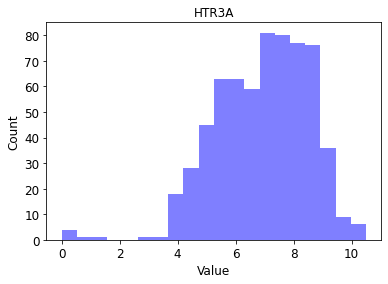

In [19]:
# Our outcome is pXC50 
column = 'pXC50'

# num_bins wil decide how many bins for creating histogram plot
num_bins = 20

# Ue the target_name as the title for the plot 
title = target_name

# Outcome data units (nanomolar = nm = $1 x 10^-9$ M )
units = 'NM'

# filepath, in this case, current dir
filepath = ""

# save_smiles_df was defined earlier
data=save_smiles_df

# call AMPL function (mouse over the function call and view source to see the code)
# The curate_data.summarize_data will summarize the data 
# output will be: 
# Total Number of results (data rows)
#   dataset mean: (mean of pXC50)
#   dataset stdev: (sd of pXC50)
#   dataset max: max value of data
#   dataset min: min value of data
curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [20]:
data.rename( columns={ "Ambit_InchiKey" : "compound_id" }, inplace=True)
data.head(5)
curated_file = ofile

In [21]:
# column: Response values column
column = 'pXC50'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# curated_file = os.path.join(working_dir, ofile)
## discard out of range values
curated_df=curated_df[curated_df['VALUE_NUM_mean']>2]
curated_df.to_csv(curated_file, index=False)

Bad duplicates removed from dataset
Dataframe size (643, 17)
List of 'bad' duplicates removed
                     compound_id    pXC50  ...   Perc_Var  VALUE_NUM_std
36   BSNKYWSMUAGMDO-UHFFFAOYNA-N  6.57025  ...  11.638406       1.223846
37   BSNKYWSMUAGMDO-UHFFFAOYNA-N  8.30103  ...  11.638406       1.223846
227  JBVRKZZSTULWTO-OAHLLOKONA-N  9.30103  ...  15.893248       1.803851
228  JBVRKZZSTULWTO-OAHLLOKONA-N  6.75000  ...  15.893248       1.803851
548  WLINCFBAKQHMPZ-OAHLLOKONA-N  8.19382  ...   9.661653       1.020935
549  WLINCFBAKQHMPZ-OAHLLOKONA-N  6.75000  ...   9.661653       1.020935

[6 rows x 5 columns]

Dataset de-duplicated
Dataframe size (602, 17)
New column created with averaged values:  VALUE_NUM_mean


## Note this includes the compounds discarded by measurement variation and out of range values

In [22]:
curated_df['Remove_BadDuplicate'].value_counts()

0    596
Name: Remove_BadDuplicate, dtype: int64

In [23]:
compound_id='rdkit_smiles'
reject=data[~data[compound_id].isin(curated_df[compound_id])]
reject

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C,COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1I
36,BSNKYWSMUAGMDO-UHFFFAOYNA-N,11184481,15561,A,6.57025,pubchem,460741,10090,HTR3A,2102,InChI=1/C14H18N4O/c1-10-2-3-12-13(15-10)16-14(...,O1C(N2C3CCN(CC3)CC2)=NC=4N=C(C=CC14)C,Cc1ccc2oc(N3CCN4CCC3CC4)nc2n1
37,BSNKYWSMUAGMDO-UHFFFAOYNA-N,11184481,3359,A,8.30103,pubchem,460743,9606,HTR3A,2102,InChI=1/C14H18N4O/c1-10-2-3-12-13(15-10)16-14(...,O1C(N2C3CCN(CC3)CC2)=NC=4N=C(C=CC14)C,Cc1ccc2oc(N3CCN4CCC3CC4)nc2n1
169,GVOCXQUIZNWEMU-YAQRNVERNA-N,14712103,3359,N,0.00000,pubchem,616534,9606,HTR3A,2102,InChI=1/C12H15N3/c1-2-4-11(5-3-1)8-13-7-6-12-9...,N(CCC=1NC=NC1)CC2=CC=CC=C2,c1ccc(CNCCc2cnc[nH]2)cc1
227,JBVRKZZSTULWTO-OAHLLOKONA-N,69937162,3359,A,9.30103,pubchem,1141224,9606,HTR3A,2102,InChI=1/C17H19ClN4O/c18-13-7-12-9-19-22-6-5-21...,ClC=1C=C2C(=O)N([C@H]3C4CCN(C3)CC4)CCN5N=CC(=C...,O=C1c2cc(Cl)cc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2
228,JBVRKZZSTULWTO-OAHLLOKONA-N,CHEMBL3261483,15561,A,6.75000,chembl20,1350972,10090,HTR3A,2102,InChI=1/C17H19ClN4O/c18-13-7-12-9-19-22-6-5-21...,C1=C(C=C2C=3N(N=C2)CCN(C(C13)=O)[C@H]4C5CCN(C4...,O=C1c2cc(Cl)cc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2
321,NECSKBYJMMVETP-UHFFFAOYNA-N,CHEMBL3233402,3359,N,1.29000,chembl20,1337830,9606,HTR3A,2102,InChI=1/C31H36N4O2/c1-32-29(36)31(26-14-6-2-7-...,C1(C(N(C(N1CCCCCN2CCN(CC2)C3=CC=CC=C3)=O)C)=O)...,CN1C(=O)N(CCCCCN2CCN(c3ccccc3)CC2)C(c2ccccc2)(...
331,NRJJRVIMKKANAW-UHFFFAOYNA-N,1408942,3359,N,0.00000,pubchem,616534,9606,HTR3A,2102,InChI=1/C15H18N4/c1-18-7-9-19(10-8-18)15-11-14...,N1(CCN(CC1)C)C=2N=CN=C(C2)C3=CC=CC=C3,CN1CCN(c2cc(-c3ccccc3)ncn2)CC1
344,OGPREQIZGSIMHW-JLGFQASFNA-N,71459241,3359,N,0.00000,pubchem,709378,9606,HTR3A,2102,"InChI=1/C16H28N4O/c1-16(2,3)13-12-14(19-18-13)...",O=C(NC1=NNC(C(C)(C)C)=C1)CCCN2CCCCC2,CC(C)(C)c1cc(NC(=O)CCCN2CCCCC2)n[nH]1
526,VJEBGMIAGKMECI-FNGIMCLKNA-N,76316933,3359,N,0.00000,pubchem,643471,9606,HTR3A,2102,InChI=1/C27H32N8O4/c1-33-18-7-6-8-19(33)16-17(...,O=C(NC1C[C@H]2N([C@@H](C1)CCC2)C)C3=NN(C4=C3C=...,CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1nn(CCCCNc3ccc([N...


## save rejected molecules for further examination

In [24]:
print("Number of discarded compounds",reject[compound_id].nunique())
# ofile=tmp_dir+target_name+'.reject_check.'+username
ofile=target_name+'.reject_check.csv'
reject.to_csv(ofile,index=False)

Number of discarded compounds 9


(0.0, 12.0)

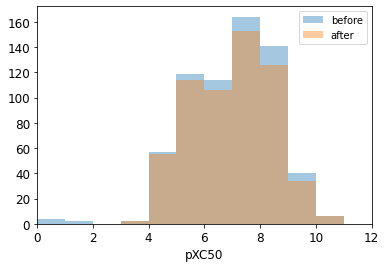

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

# This will be our before curation
before=data["pXC50"]

# current curated dataframe will not include any out of range values
after=curated_df["pXC50"]

sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])

## Let us cluster the compounds to explore the chemical space


Project compounds into two dimensions with UMAP and Tanimoto similiarty

1.   Cluster compounds by Tanimoto similarity
2.   Repeat steps 1 and 2 with Maximum Common Substructure distance when dataset size is below # threshold (default < 300)

See documentation here:
 https://ampl.readthedocs.io/en/latest/pipeline.html?highlight=diversity_plots#pipeline.diversity_plots.diversity_plots

 </li>

# Save output from clustering heatmap to image and upload to presentation

In [ ]:
# ifile=tmp_dir+target_name+'_excape.csv.'+username
ifile=target_name+'_excape.csv'

# Plot self similarity (Tanimoto) within dataset and show distribution of distances between compounds in dataset for nearest neighbor.

## Save  distribution plot as an image.

We will be calling dp.diversity_function from AMPL in the following code chunk. For AMPL function explanations, 
please consult AMPL documentation here, https://ampl.readthedocs.io/en/latest/pipeline.html?highlight=diversity_plots#pipeline.diversity_plots.diversity_plots 

## Here is a brief explanation of `dp` function: 

### The AMPL function will calculate diversity profile for the data. 

### Input Args:


*   **dset_key:** : Name of the input data variable 
*   **datastore** : 
*   **id_col**    : Ambit_InchiKey, it is a chemical identifier for the compound or drug molecules. Please check here for a detailed explanation of InChiKey, https://en.wikipedia.org/wiki/International_Chemical_Identifier#:~:text=%2B%2Fm0%2Fs1-,InChIKey,hashed%20counterpart%20of%20standard%20InChI. In this case, Excape is using InChiKey generated from Ambit
*   **response_col**: Outcome column, in out case it is pXC50

## `dp.diversity_plots` function

*    Computes Fingerprints 
*    If the number of compounds are > 300, it will compute Fingerprints and use it to compute Tanimoto distance matrix. plot the distances using UMAP projection and cluster (complete cluster method will be used) the distances to create a heatmap
*   If the number of compounds are < 300, MCS (Maximum Common Substructure) will be in addition the above step. 


## Helpful links

* Tanimoto 
    * https://en.wikipedia.org/wiki/Jaccard_index
    * https://en.wikipedia.org/wiki/Chemical_similarity
* UMAP
    * https://pair-code.github.io/understanding-umap/
* MCS
    * https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2718661/ 

Canonicalizing 605 molecules...
Done
Computing fingerprints...
Done
Computing Tanimoto distance matrix...
Done


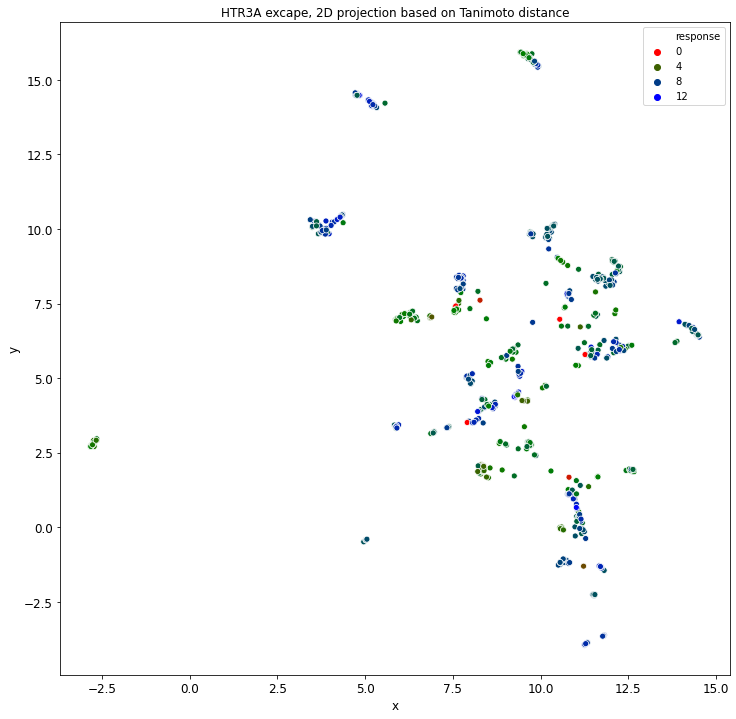

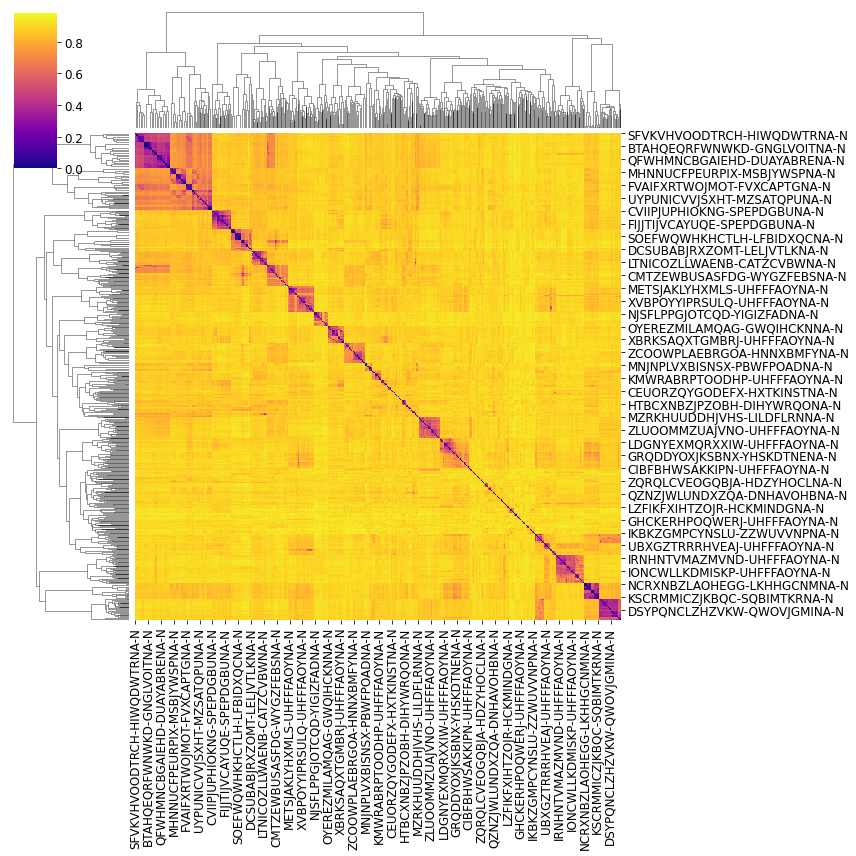

In [ ]:
dp.diversity_plots(dset_key=ifile,datastore=False,id_col='Ambit_InchiKey',response_col='pXC50')

## Self similarity (Tanimoto) 

Calculate self-similarity (using Tanimoto) for the dataset and plot the distanes. 

In [ ]:
feat_type = 'ECFP'
dist_metric = 'tanimoto'
smiles_lst1 = save_smiles_df['rdkit_smiles'].tolist()
calc_type = 'nearest'
dist_sample = cd.calc_dist_smiles(feat_type, dist_metric, smiles_lst1, None, calc_type)

In [ ]:
print(len(dist_sample))
print(len(smiles_lst1))

649
649


## What does **calc_dist_smiles** function return? 


*   input is a list of SMILES strings
*   data featurization: ECFP (Fingerprint)
*   What distance metric to use? Tanimoto
*   How to process distance matrix, nearest ?
*   returns a distance matrix as a vector of distances

Here is the function summary:

*   rdkit is used to transform SMILES to mols
*   mols to FP (Morgan, 1024 FP)
*   calls calc_summary with the following options: 
         * fprints1 is the FP 
         * fprints2 is none 
         * dist_metrics will return a distance matrix
    calc_summary(dist_metrics.tanimoto(fprints1, fprints2), calc_type=nearest, num_nearest=1, within_dset=True)

* Finally, returns the distances of each atom to its closest neighbor 



## Explanation for the following code chunk

* **scipy.stats.kde** will use kernel density function to estimate the probability density function (PDE)
---



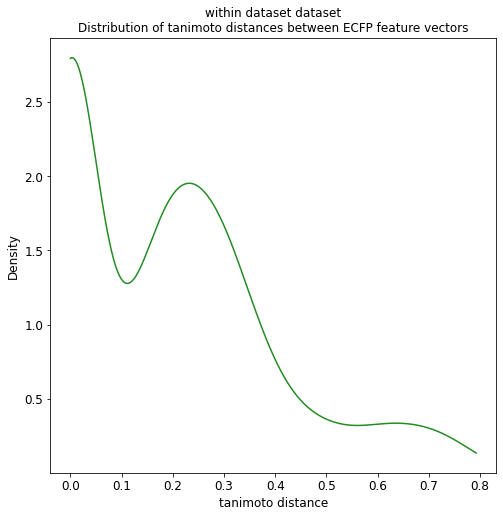

In [ ]:
from scipy.stats.kde import gaussian_kde

# import math library
import numpy as np

# for creating plots
import matplotlib.pyplot as plt

# current directory
odir='./'

# name for the task
task_name='within dataset'

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [ ]:
!date # ending time

Fri Feb 12 14:54:35 UTC 2021
